In [1]:
#睡眠日志可视化

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.patches import Ellipse ,Polygon
from matplotlib.ticker import FixedLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.font_manager import FontProperties

In [3]:
def extract_sleep_data(file_path):
    """
    读取指定路径的Excel文件并提取睡眠相关数据。

    参数:
    file_path (str): Excel文件的路径。

    返回:
    tuple: 包含以下数据的元组：
        - bedtime_list (list of str): 每天上床时间的列表。
        - sleep_onset_list (list of str): 每天入睡时间的列表。
        - wake_up_time_list (list of str): 每天醒来时间的列表。
        - get_up_time_list (list of str): 每天起床时间的列表。
        - subject_name (str): 记录的姓名。
        - log_dates (list of str): 日志填写日期的列表（不包括使用前日期）。
        - wake_states (list of str): 每天醒来状态的列表。
    """
    
    # 读取Excel文件并存储到DataFrame中
    df = pd.read_excel(file_path)
    
    # 提取记录的姓名
    subject_name = df["1、姓名："][0]
    
    # 将DataFrame转换为numpy数组进行处理
    data_array = df.to_numpy()
    
    # 初始化日志填写日期和醒来状态的列表
    log_dates = []
    wake_states = []
    
    for record in data_array:
        # 提取日志填写日期（格式化为"MM-DD"）
        log_dates.append(str(record[1])[5:10])
        # 提取醒来状态
        wake_states.append(record[17])
    
    # 移除使用前的日期记录，因为该记录在使用前醒来状态未知
    log_dates.pop(0)
    wake_states[0] = ' '

    # 初始化时间列表
    bedtime_list = []
    sleep_onset_list = []
    wake_up_time_list = []
    get_up_time_list = []
    
    for record in data_array:
        # 提取上床时间并格式化为"HH:MM"
        bedtime_list.append(f"{record[9]}:{record[10]}")
        # 提取入睡时间并格式化为"HH:MM"
        sleep_onset_list.append(f"{record[11]}:{record[12]}")
        # 提取醒来时间并格式化为"HH:MM"
        wake_up_time_list.append(f"{record[13]}:{record[14]}")
        # 提取起床时间并格式化为"HH:MM"
        get_up_time_list.append(f"{record[15]}:{record[16]}")

    # 返回提取的数据
    return bedtime_list, sleep_onset_list, wake_up_time_list, get_up_time_list, subject_name, log_dates, wake_states

In [4]:
def save_img(bedtime_list, sleep_onset_list, wake_up_time_list, get_up_time_list, name, use_time,mbd,satrt_time,end_time,fsize,yxy):

    """
    保存睡眠日志图像并添加注释。

    参数:
    - bedtime_list (list of str): 每天上床时间的列表。
    - sleep_onset_list (list of str): 每天入睡时间的列表。
    - wake_up_time_list (list of str): 每天醒来时间的列表。
    - get_up_time_list (list of str): 每天起床时间的列表。
    - name (str): 记录的姓名。
    - use_time (list of str): 日志填写日期的列表（不包括使用前日期）。
    - mbd (list of str): 每天的备注信息。
    - start_time (int): y轴开始的小时。
    - end_time (int): y轴结束的小时。
    - fsize (tuple): 图的大小。
    - yxy (float): y轴标签位置。

    返回:
    None
    """
    font_path = '../data/SimHei.ttf'
    prop = FontProperties(fname=font_path, size=7)

    # 时间数据
    bedtime_list = [datetime.strptime(time, '%H:%M') for time in bedtime_list]
    sleep_onset_list = [datetime.strptime(time, '%H:%M') for time in sleep_onset_list]
    wake_up_time_list = [datetime.strptime(time, '%H:%M') for time in wake_up_time_list]
    get_up_time_list = [datetime.strptime(time, '%H:%M') for time in get_up_time_list]

    # 如果时间在午夜之后但早于中午，则将日期前移一天，以便正确显示
    bedtime_list = [(time if time >= datetime.strptime('12:00', '%H:%M') else time + timedelta(days=1)) for time in bedtime_list]
    sleep_onset_list = [(time if time >= datetime.strptime('12:00', '%H:%M') else time + timedelta(days=1)) for time in sleep_onset_list]
    wake_up_time_list = [(time if time >= datetime.strptime('12:00', '%H:%M') else time + timedelta(days=1)) for time in wake_up_time_list]
    get_up_time_list = [(time if time >= datetime.strptime('12:00', '%H:%M') else time + timedelta(days=1)) for time in get_up_time_list]

    # 创建一个索引列表，用于表示每一天的数据
    indices = list(range(0, len(bedtime_list)))
    
    # 创建图形和轴
    fig, ax = plt.subplots(figsize=fsize)

    light_blue = '#ADD8E6'

    # 绘制条形图
    for i in range(len(bedtime_list)):
        bar1 = ax.bar(indices[i], sleep_onset_list[i] - bedtime_list[i], bottom=bedtime_list[i], color='orange', alpha=0.8, edgecolor='black', linewidth=1, zorder=1)
        bar2 = ax.bar(indices[i], wake_up_time_list[i] - sleep_onset_list[i], bottom=sleep_onset_list[i], color=light_blue, alpha=0.8, edgecolor='black', linewidth=1, zorder=1)
        bar3 = ax.bar(indices[i], get_up_time_list[i] - wake_up_time_list[i], bottom=wake_up_time_list[i], color='b', alpha=0.8, edgecolor='black', linewidth=1, zorder=1)
        
        time_str = bedtime_list[i].strftime('%H:%M')
        time_str1 = sleep_onset_list[i].strftime('%H:%M')
        time_str2 = wake_up_time_list[i].strftime('%H:%M')
        time_str3 = get_up_time_list[i].strftime('%H:%M')

        ax.text(indices[i], bedtime_list[i], (time_str), ha='center', va='top', fontproperties=prop, color='purple')
        ax.text(indices[i], sleep_onset_list[i], (time_str1), ha='center', va='bottom', fontproperties=prop, color='purple')
        ax.text(indices[i], wake_up_time_list[i], (time_str2), ha='center', va='top', fontproperties=prop, color='purple')
        ax.text(indices[i], get_up_time_list[i], (time_str3), ha='center', va='bottom', fontproperties=prop, color='purple')
        ax.text(indices[i], get_up_time_list[i], f" {mbd[i]}\n 睡眠时长\n{round((wake_up_time_list[i] - sleep_onset_list[i]).total_seconds() / 3600,1)}h \n入睡时长\n {int(((sleep_onset_list[i] - bedtime_list[i]).total_seconds())//60)}min\n \n", ha='center', va='bottom', fontproperties=prop,fontweight='bold')


    # 图上添加注释****************************************************************************************************************************************************************
    #箭头的纵轴坐标
    annotation_time1 = datetime.strptime('22:00', '%H:%M')
    # 文本的纵轴坐标
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    # 横轴坐标
    annotation_index = use_time.index("07-14")
    plt.annotate('早醒',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
    
    
    
    annotation_time1 = datetime.strptime('22:00', '%H:%M')
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("07-27")
    plt.annotate('入睡困难加药了',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
    


    annotation_time1 = datetime.strptime('22:00', '%H:%M')
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("07-30")
    plt.annotate('入睡困难',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
    
    
    annotation_time1 = datetime.strptime('22:00', '%H:%M')
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("07-31")
    annotation_index2 = use_time.index("08-01")


    plt.annotate('入睡困难',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index2, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
 
    
    annotation_time1 = datetime.strptime('21:30', '%H:%M')
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("08-10")
    annotation_index2 = use_time.index("08-08")


    plt.annotate('第五周开始',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index2, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头

    
    annotation_time1 = datetime.strptime('5:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('10:00', '%H:%M')+ timedelta(days=1)
    annotation_index = use_time.index("07-16")
    annotation_index2 = use_time.index("07-15")
    plt.annotate('四周28天内有21天五点醒，醒来的时间很稳定',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index2, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
    
    
    
    annotation_time1 = datetime.strptime('8:00', '%H:%M')+ timedelta(days=1)
    annotation_index = use_time.index("07-21")
    annotation_index2 = use_time.index("07-28")
    plt.annotate('四周时间内睡眠时长大于等于7小时有7天,其中有6天是22点之前上床打开香薰机准备入睡,越早上床打开香薰，睡眠时间越长',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index2, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='red', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='red'))  # 红色箭头
    


    annotation_time1 = datetime.strptime('7:30', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('9:30', '%H:%M')+ timedelta(days=1)
    annotation_index = use_time.index("08-09")
    annotation_index2 = use_time.index("08-09")
    plt.annotate('非入睡困难（入睡时长小于等于30min），从第四周末开始次数逐渐增多',             # 注释文本 (中文)
                xy=(annotation_index, annotation_time1),              # 箭头指向的坐标
                xytext=(annotation_index2, annotation_time2),      # 注释文本所在的坐标
                ha='center',                # 水平对齐方式
                va='bottom',                # 垂直对齐方式
                color='b', 
                fontsize=10,                               # 文本颜色
                fontproperties=prop,     # 应用中文字体
                arrowprops=dict(arrowstyle='->', color='b'))  # 红色箭头
    
    
    
    
    # *******************************************************************************将椭圆添加到当前坐标系中****************************************************************************
    annotation_time1 = datetime.strptime('09:08', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("07-13")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)   # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    annotation_time1 = datetime.strptime('08:30', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:00', '%H:%M')
    annotation_index = use_time.index("07-15")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中


    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:20', '%H:%M')
    annotation_index = use_time.index("07-19")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中


    annotation_time1 = datetime.strptime('08:10', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:20', '%H:%M')
    annotation_index = use_time.index("07-18")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中


    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    annotation_time2 = datetime.strptime('7:20', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')


    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:20', '%H:%M')
    annotation_index = use_time.index("07-20")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    annotation_time2 = datetime.strptime('7:10', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')


    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:10', '%H:%M')
    annotation_index = use_time.index("07-21")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    annotation_index = use_time.index("08-06")
    annotation_time2 = datetime.strptime('7:10', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')


    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('22:00', '%H:%M')
    annotation_index = use_time.index("07-24")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='green', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中
    


    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:30', '%H:%M')
    annotation_index = use_time.index("08-10")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    annotation_time1 = datetime.strptime('08:00', '%H:%M')+ timedelta(days=1)
    annotation_time2 = datetime.strptime('21:30', '%H:%M')
    annotation_index = use_time.index("08-11")
    ellipse = Ellipse((annotation_index, annotation_time1), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    ellipse = Ellipse((annotation_index, annotation_time2), width=0.9, height=0.05, angle=0, color='r', fill=False)  # (x, y) 为中心坐标
    plt.gca().add_patch(ellipse)  # 将椭圆添加到当前坐标系中

    # ******************************************************************************************添加横线*************************************************************************************
    annotation_time1 = datetime.strptime('04:50', '%H:%M')+ timedelta(days=1)
    plt.axhline(y=annotation_time1,color = 'r',linestyle="-",linewidth=1)

    #********************************************************************************************添加*区分每周********************************************************************************    
    annotation_time2 = datetime.strptime('20:10', '%H:%M')
    annotation_index = use_time.index("07-19")
    plt.scatter(annotation_index,annotation_time2,marker='*',s=50,color = 'r')

    annotation_time2 = datetime.strptime('20:10', '%H:%M')
    annotation_index = use_time.index("08-02")
    plt.scatter(annotation_index,annotation_time2,marker='*',s=50,color = 'r')

    annotation_time2 = datetime.strptime('20:10', '%H:%M')
    annotation_index = use_time.index("08-09")
    plt.scatter(annotation_index,annotation_time2,marker='*',s=50,color = 'r')

    annotation_time2 = datetime.strptime('20:10', '%H:%M')
    annotation_index = use_time.index("07-26")
    plt.scatter(annotation_index,annotation_time2,marker='*',s=50,color = 'r')
    
    
    # ******************************************************************************************添加蓝色矩形框********************************************************************************
    annotation_index = use_time.index("07-14")
    annotation_time2 = datetime.strptime('7:20', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')

    annotation_index = use_time.index("08-09")
    annotation_time2 = datetime.strptime('7:10', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')


    annotation_index = use_time.index("08-10")
    annotation_time2 = datetime.strptime('7:10', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')

    annotation_index = use_time.index("08-11")
    annotation_time2 = datetime.strptime('7:20', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')


    annotation_index = use_time.index("08-11")
    annotation_time2 = datetime.strptime('8:10', '%H:%M')+ timedelta(days=1)
    plt.scatter(annotation_index,annotation_time2,marker='s',s=400,color = 'none',edgecolors='b')

    # 设置图表标题和轴标签
    plt.title(f'{name}[{use_time[0]}]-[{use_time[-1]}]睡眠日志', fontproperties=prop,fontsize=10,y=yxy)

    plt.ylabel('时间', fontproperties=prop)

    # 格式化 y 轴刻度
    ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # 设置 y 轴的限制，使其从 12:00 开始
    midnight = datetime.strptime('00:00', '%H:%M')
    noon = datetime.strptime('12:00', '%H:%M')
    

    # 设置 y 轴的范围，从午夜开始加上开始时间和结束时间
    ax.set_ylim(midnight + timedelta(hours=satrt_time), midnight + timedelta(hours=end_time+24))
    # 设置 y 轴的刻度，在开始时间和结束时间之间，每小时一个刻度
    ax.set_yticks([midnight + timedelta(hours=h) for h in range(satrt_time, end_time+1+24)])

    # 将 "使用前" 添加到 use_time 列表的开头
    use_time = ["使用前"] + use_time
    # 创建一个位置列表，用于 x 轴的刻度
    positions = list(range(len(use_time)))
    # 设置 x 轴的刻度位置
    ax.set_xticks(positions)
    # 设置 y 轴的刻度标签，格式为小时:分钟
    ax.set_yticklabels([(midnight + timedelta(hours=h)).strftime('%H:%M') for h in range(satrt_time, end_time+24+1)])
    # 设置 x 轴的刻度标签，使用指定的字体属性
    ax.set_xticklabels(use_time, fontproperties=prop)

    # 移除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 保存图像为SVG 格式，png格式并显示
    plt.savefig(f"../result/{name}.svg", dpi=1500 ,format="svg")
    plt.savefig(f"../result/{name}.png", dpi=1500 )
    plt.show()

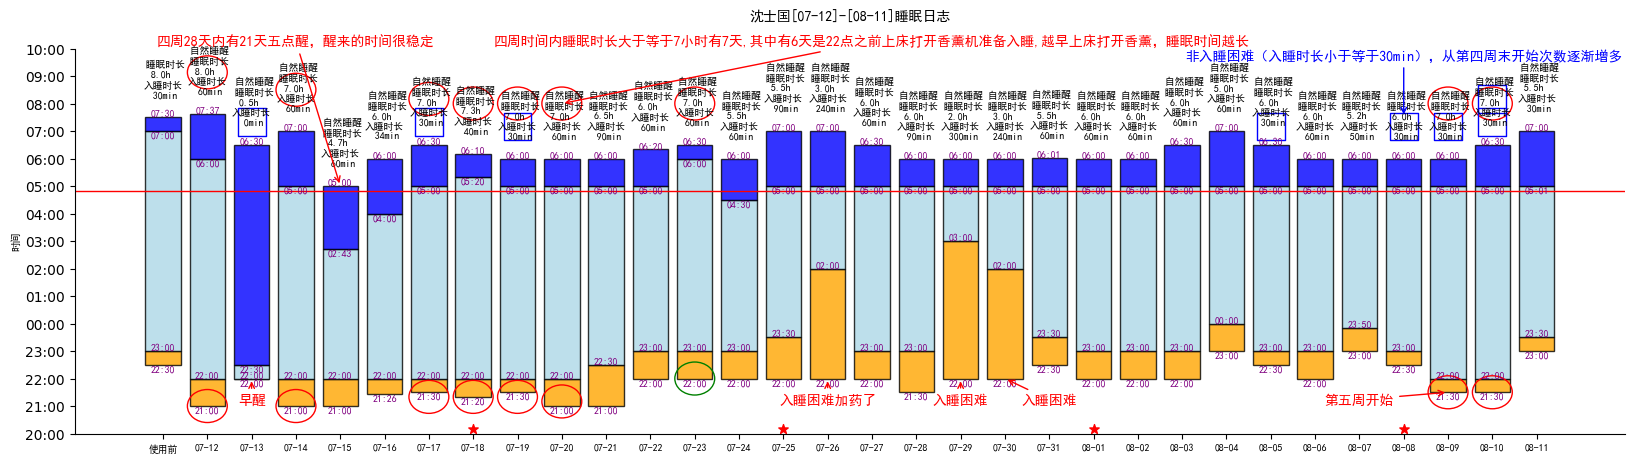

In [5]:
if __name__=="__main__":
    # 设置中文字体和大小
    path = "../data/沈士国Sleep_Log_new - 副本.xlsx"
    bedtime_list, sleep_onset_list, wake_up_time_list, get_up_time_list, subject_name, log_dates, wake_states = extract_sleep_data(path)
    save_img(bedtime_list, sleep_onset_list, wake_up_time_list, get_up_time_list, subject_name, log_dates, wake_states,satrt_time=20,end_time=10,fsize=(20, 5),yxy=1.05)